In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

### Static Variables

In [2]:
linefiles = os.listdir("bus_data/clean_data2")
lines = []
for line in linefiles:
    lines.append(line.replace(".csv",""))
    


### Extracting Data

### Read in External Data

In [20]:
schedule = pd.read_csv("bus_data/dublinbus_scheduledData2013csv.csv", low_memory=False, encoding="ISO-8859-1")

In [21]:
# Dropping null values - some in our dataframe are marked as 'null' (string) for some reason?
schedule = schedule.dropna()
schedule = schedule[schedule.stop_id != 'null']

In [22]:
# Extracting StopID from stop_id

def get_stop(string):
    var = string[-4:]
    return var

schedule["StopID"] = schedule['stop_id'].apply(lambda x: get_stop(x))

In [23]:
# Extracting LineID from trip_id
schedule["LineID"] = schedule["trip_id"].str.extract('\-(.*?)\-')

C:\Users\eogha\Anaconda3\envs\comp47350\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [24]:
# Convert StopIDs back to int
# df['StopID'] = df['StopID'].astype('int64')
schedule['StopID'] = schedule['StopID'].astype('int64')

In [25]:
# Extracting direction from trip_id
def get_direction(string):
    var = string[-1:]
    return var

schedule["Direction"] = schedule['trip_id'].apply(lambda x: get_direction(x))

In [26]:
def get_first_bit(string):
    var = string.split("-")[0]
    return var

schedule["first_bit"] = schedule['trip_id'].apply(lambda x: get_first_bit(x))

In [27]:
def get_middle_bit(string):
    var = string.split("-")[2]
    return var

schedule["middle_bit"] = schedule['trip_id'].apply(lambda x: get_middle_bit(x))

In [28]:
def get_last_bit(string):
    var = string.split("-")[3][2:-2]
    return var

schedule["last_bit"] = schedule['trip_id'].apply(lambda x: get_last_bit(x))

In [29]:
# Converting Direction to JourneyPatternID
schedule["JourneyPatternID"] = schedule['Direction'].apply(lambda x: "1001" if x == "I" else "0001")
schedule['JourneyPatternID'] = schedule['JourneyPatternID'].astype('int64')

### Exploration

#### Investigate Trip ID

In [30]:
#Extract Modal Journey Length for each line in each direction
newschedule = pd.DataFrame()
jplist = [1,1001]
for jp in jplist:
    for line in lines:
        print("reading",line, jp)
        linedata = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == jp )]
        #Extract Modal Journey Length
        if not (linedata.empty):
            if len(linedata.first_bit.value_counts().values)<=1:
        #mode doesnt work on a sinleton list
                modal = linedata.first_bit.value_counts().values[0]
            else:
                modal = linedata.first_bit.value_counts().mode().values[0]

            tempdf = linedata.first_bit.value_counts()
            #create list of last_bit labels of only the major route length
            fulltrips = tempdf[tempdf.values == modal].index

            newschedule = newschedule.append(linedata[linedata['first_bit'].isin(fulltrips)])

1
102
104
11
111
114
116
118
120
122
123
13
130
14
140
142
145
14C
15
150
151
15A
15B
16
161
16C
17
17A
18
184
185
220
236
238
239
25
25A
25B
25X
26
27
270
27A
27B
27X
29A
31
31A
31B
32
32A
32B
32X
33
33A
33B
33X
37
38
38A
38B
39
39A
4
40
40B
40D
41
41A
41C
41X
42
43
44
44B
45A
46A
46E
47
49
51D
51X
53
54A
56A
59
61
63
65
65B
66
66A
66B
66X
67
67X
68
68A
69
69X
7
70
747
75
76
76A
77A
79
79A
7B
7D
8
83
83A
84
84A
84X
9
PP07
1
102
104
11
111
114
116
118
120
122
123
13
130
14
140
142
145
14C
15
150
151
15A
15B
16
161
16C
17
17A
18
184
185
220
236
238
239
25
25A
25B
25X
26
27
270
27A
27B
27X
29A
31
31A
31B
32
32A
32B
32X
33
33A
33B
33X
37
38
38A
38B
39
39A
4
40
40B
40D
41
41A
41C
41X
42
43
44
44B
45A
46A
46E
47
49
51D
51X
53
54A
56A
59
61
63
65
65B
66
66A
66B
66X
67
67X
68
68A
69
69X
7
70
747
75
76
76A
77A
79
79A
7B
7D
8
83
83A
84
84A
84X
9
PP07


In [34]:
#extract only the relevant columns
routestations = newschedule[['LineID','StopID','stop_sequence','stop_headsign','JourneyPatternID','Name','Name without locality','Lat','Long']]

In [35]:
routestations = routestations.drop_duplicates()

In [36]:
### THIS DOES IT ALL!?!??!?!
new_grouped = routestations.groupby(['LineID','JourneyPatternID','stop_sequence',]).agg(lambda x:x.value_counts().index[0])


In [37]:
#remove multi-indexing
df = new_grouped.reset_index()

In [50]:
# View Stop Order for given line in given direction!
route = df[(df.LineID=="15B")&(df.JourneyPatternID==1)]

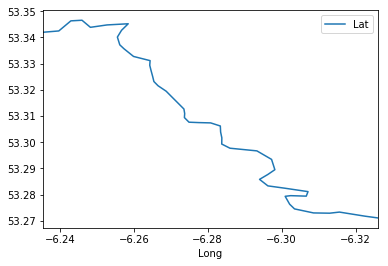

In [51]:
# route.plot(x='Long', y='Lat')

In [38]:
df.to_csv("routestations3.csv")

In [119]:
check
# # jplist = [1,1001]
# #check there are each sequence_number has only one entry
# for line in lines:
#     for jp in jplist:
#         checklist = list(df[(df.LineID == line) & (df.JourneyPatternID == jp)].stop_sequence.value_counts())
#         for i in checklist:
#             if i != 1:
#                 print("Error",line,jp)